# TAREA 3 MATEMATÍCAS AVANZADAS

Insertamos las librerías necesarias

In [1]:
#Para manejo de datos
import pandas as pd
#Para manejo de fechas
from datetime import timedelta, datetime
#Librería matematica
import math as mt
import numpy as np
#Para graficar
import matplotlib.pyplot as plt

Importamos los archivos CSV haciendo uso del método read_csv de la librería pandas que tiene el alías pd, el prímer parametro es la rúta del archivo que en este caso es la misma del notebook, así que solo pasamos nombre del archivo, el segúndo parametro es el separador usado en el csv que en este caso es el caracter coma.

In [2]:
dataset1 = pd.read_csv('Humedad_Patron.csv',sep=",")
dataset2 = pd.read_csv('Humedad_Station.csv',sep=",")

Creamos una copia del dataset 1, añadimos una nueva columna donde se va a colorar la hora en formato 24 Horas

In [3]:
dataset1_sub = dataset1
dataset1_sub['Hour_24']=dataset1_sub['Hour']
dataset1_sub.head()

,Date,Hour,Humidity,Hour_24
0,05/12/17,2:15 p,75,2:15 p
1,05/12/17,2:20 p,75,2:20 p
2,05/12/17,2:25 p,74,2:25 p
3,05/12/17,2:30 p,73,2:30 p
4,05/12/17,2:35 p,73,2:35 p


Dependiendo de la letra que acompaña la hora convertimos en formato 24 Horas

In [4]:
new_hour_list = []
for index, row in dataset1_sub.iterrows():
    if row["Hour"][-1] =='p':
        if row["Hour"][1] == ':':
            new_hour_list.append(str(int(row["Hour_24"][0])+12)+row["Hour_24"][1:-2]+":00")
        elif row["Hour"][2] == ':':
            if row["Hour_24"][0:2] != '12':
                new_hour_list.append(str(int(row["Hour_24"][0:2])+12)+row["Hour_24"][2:-2]+":00")
            else:
                new_hour_list.append(row["Hour_24"][:-2]+":00")
    else:
        new_hour_list.append(row["Hour_24"][:-2]+":00")

dataset1_sub.update(pd.DataFrame({'Hour_24': new_hour_list}))
dataset1_sub.head()

,Date,Hour,Humidity,Hour_24
0,05/12/17,2:15 p,75,14:15:00
1,05/12/17,2:20 p,75,14:20:00
2,05/12/17,2:25 p,74,14:25:00
3,05/12/17,2:30 p,73,14:30:00
4,05/12/17,2:35 p,73,14:35:00


Añadimos la columna Time que contiene la fecha absoluta "fecha y hora" donde se registro la humedad

In [5]:
time_list = []
for index, row in dataset1_sub.iterrows():
    time_list.append(datetime.strptime(row['Date']+' ' + row['Hour_24'], '%d/%m/%y %H:%M:%S'))
dataset1_sub['Time'] = time_list
dataset1_sub.head()

,Date,Hour,Humidity,Hour_24,Time
0,05/12/17,2:15 p,75,14:15:00,2017-12-05 14:15:00
1,05/12/17,2:20 p,75,14:20:00,2017-12-05 14:20:00
2,05/12/17,2:25 p,74,14:25:00,2017-12-05 14:25:00
3,05/12/17,2:30 p,73,14:30:00,2017-12-05 14:30:00
4,05/12/17,2:35 p,73,14:35:00,2017-12-05 14:35:00


Creamos la columna DateTime que contiene la fecha en tipo de dato fecha para poder gráficar.

In [6]:
dataset2['DateTime']=pd.to_datetime(dataset2['Time'], unit='s')
dataset2.head()

,Time,Humidity,DateTime
0,1511906403,58.34,2017-11-28 22:00:03
1,1511906405,57.54,2017-11-28 22:00:05
2,1511906407,58.18,2017-11-28 22:00:07
3,1511906409,58.18,2017-11-28 22:00:09
4,1511906412,58.18,2017-11-28 22:00:12


Normalizamos la cantidad de elementos del dataset 2 de forma que solo tenga 2080 elementos igual que el dataset 1

In [7]:
date_list=[]
date_unix_list=[]
Humidity_list=[]
count=1
humidity_prom = 0
for index,row in dataset2.iterrows():
    if count == 1:
        date_list.append(row['DateTime'])
        date_unix_list.append(row['Time'])
    
    humidity_prom = humidity_prom + row['Humidity']
    
    
    if count == 147:
        count = 1
        Humidity_list.append(humidity_prom/147)
        humidity_prom = 0
    else:
        count+=1

Creamos el dataset2 "normalizado"

In [8]:
dataset2_normal = pd.DataFrame({'Time': date_unix_list[:-1],'DateTime': date_list[:-1],'Humidity':Humidity_list})
dataset2_normal.head()

,Time,DateTime,Humidity
0,1511906403,2017-11-28 22:00:03,61.156735
1,1511906733,2017-11-28 22:05:33,61.332041
2,1511907063,2017-11-28 22:11:03,62.611701
3,1511907393,2017-11-28 22:16:33,62.160884
4,1511907723,2017-11-28 22:22:03,63.044286


Graficamos el dataset 1

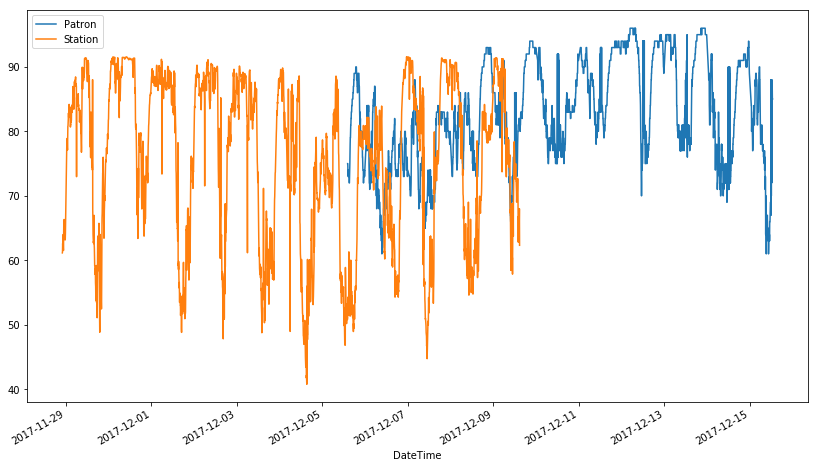

In [15]:
ax = dataset1_sub.plot(x="Time", y="Humidity",label="Patron")
dataset2_normal.plot(figsize=(14, 8),ax=ax,x="DateTime", y="Humidity",label="Station")

Sobreponemos uno sobre otro

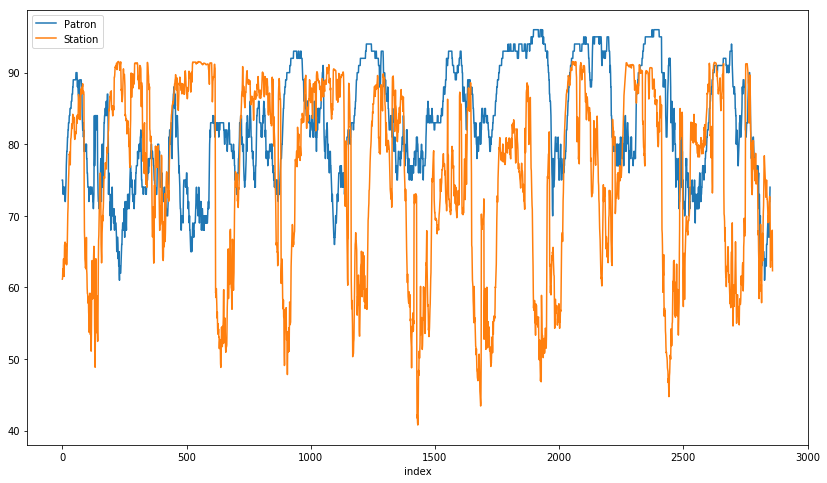

In [22]:
dataset1_sub
ax = dataset1_sub.reset_index().plot(x="index", y="Humidity",label="Patron")
dataset2_normal.reset_index().plot(figsize=(14, 8),ax=ax,x="index", y="Humidity",label="Station")

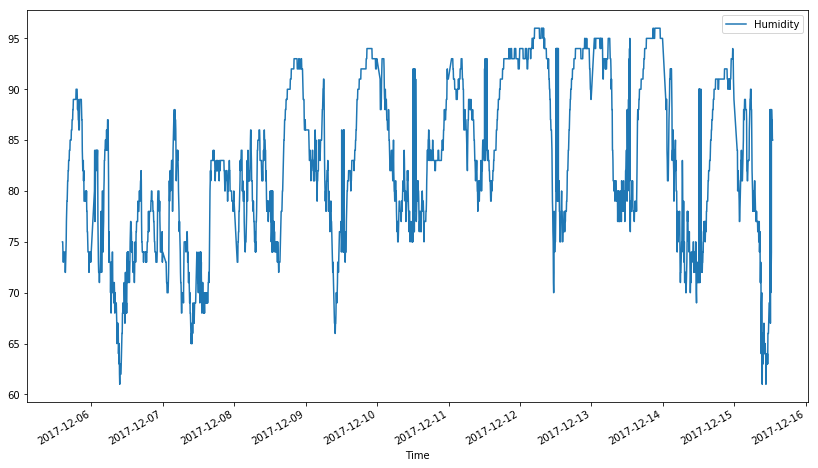

In [65]:
dataset1_sub.plot(figsize=(14, 8),x="Time", y="Humidity")

Graficamos el dataset 2

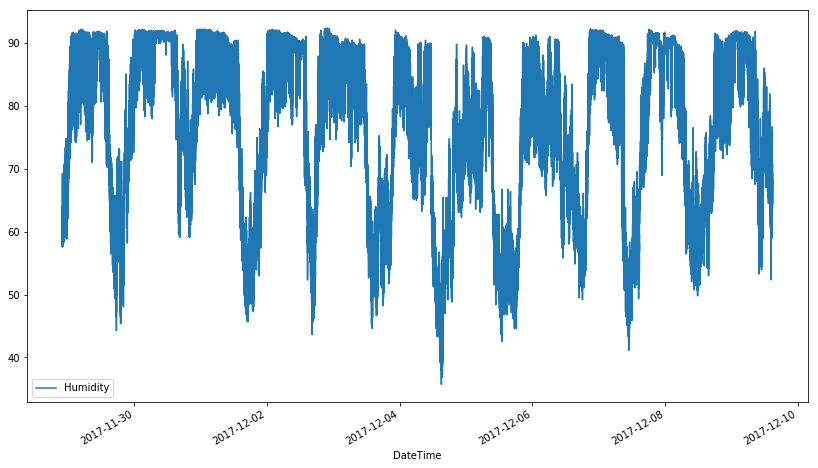

In [66]:
dataset2.plot(figsize=(14, 8),x="DateTime", y="Humidity")

Graficamos Dataset 2 "Normalizado"

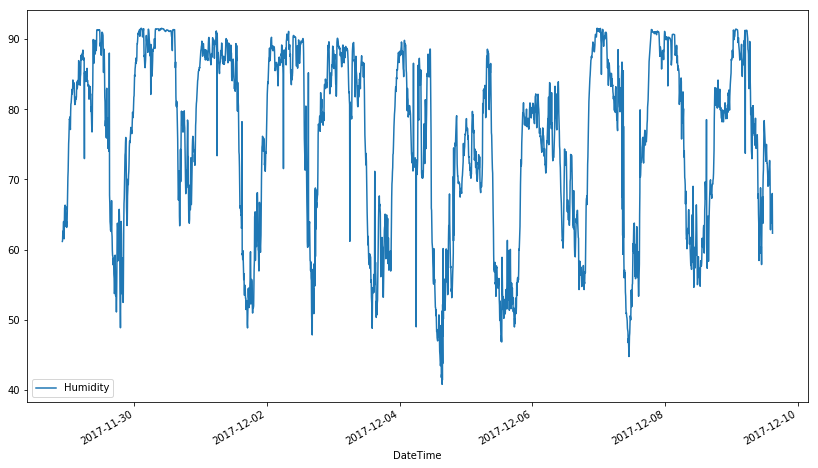

In [12]:
dataset2_normal.plot(figsize=(14, 8),x="DateTime", y="Humidity")

Propiedades de los dataset

In [13]:
dataset1_sub.describe()

,Humidity
count,2850.000000
mean,82.790175
std,8.057108
min,61.000000
25%,77.000000
50%,83.000000
75%,90.000000
max,96.000000


In [14]:
dataset2.describe()

,Time,Humidity
count,4.204250e+05,420425.000000
mean,1.512369e+09,75.732253
std,2.661281e+05,12.873166
min,1.511906e+09,35.710000
25%,1.512140e+09,65.300000
50%,1.512368e+09,78.910000
75%,1.512600e+09,87.290000
max,1.512831e+09,92.350000


In [15]:
dataset2_normal.describe()

,Time,Humidity
count,2.860000e+03,2860.000000
mean,1.512369e+09,75.732527
std,2.662096e+05,12.769685
min,1.511906e+09,40.779796
25%,1.512140e+09,65.513367
50%,1.512368e+09,78.883878
75%,1.512600e+09,87.198980
max,1.512831e+09,91.559116


insertamos una columna en dataset1_sub para tener el tiempo en hora unix

In [16]:
dataset1_sub["UnixTime"] = (dataset1_sub["Time"] - datetime(1970, 1, 1)) / timedelta(seconds=1)
dataset1_sub.head()

,Date,Hour,Humidity,Hour_24,Time,UnixTime
0,05/12/17,2:15 p,75,14:15:00,2017-12-05 14:15:00,1.512483e+09
1,05/12/17,2:20 p,75,14:20:00,2017-12-05 14:20:00,1.512484e+09
2,05/12/17,2:25 p,74,14:25:00,2017-12-05 14:25:00,1.512484e+09
3,05/12/17,2:30 p,73,14:30:00,2017-12-05 14:30:00,1.512484e+09
4,05/12/17,2:35 p,73,14:35:00,2017-12-05 14:35:00,1.512484e+09


Cálculo de la distancia entre dataset1_sub y dataset2_normal

In [41]:
#Tamaño dataset 1
print(len(dataset1_sub))
#Tamaño dataset 2
print(len(dataset2_normal))

suma = 0
suma_out = 0

for i in range(2850):
    distancia_punto_i = (dataset1_sub.iloc[i]["Humidity"] - dataset2_normal.iloc[i]["Humidity"])**2 + (dataset1_sub.iloc[i]["UnixTime"] - dataset2_normal.iloc[i]["Time"])**2
    suma = suma + distancia_punto_i

print("Suma distancias")
print(suma)
print("Raiz suma distancias")
print(mt.sqrt(suma))
print("Promedio distancia")
print(mt.sqrt(suma)/2850)

2850
2860
Suma distancias
856901120315415.1
Raiz suma distancias
29272873.455050755
Promedio distancia
10271.183668438862


In [48]:
a = pd.DataFrame({'A': dataset1_sub["Humidity"].values,'B': dataset1_sub["UnixTime"].values})
b = pd.DataFrame({'A': dataset2_normal["Humidity"][:2850].values,'B': dataset2_normal["Time"][:2850].values})

print("Distancia Euclideana entre A y B")
print(np.linalg.norm(a-b))
print("Distancia Euclideana entre A y B Manual")
print(mt.sqrt(np.sum(np.sum((a-b)**2,axis=1))))
print("Distancia Euclideana Máxima entre A y B por puntos")
print(mt.sqrt(max(np.sum((a-b)**2,axis=1))))

Distancia Euclideana entre A y B
29272873.455050737
Distancia Euclideana entre A y B Manual
29272873.455050737
Distancia Euclideana Máxima entre A y B por puntos
629067.000081973


In [26]:
a = pd.DataFrame({'A': dataset1_sub["Humidity"].values,'B': dataset1_sub.reset_index()["index"].values})
b = pd.DataFrame({'A': dataset2_normal["Humidity"][:2850].values,'B': dataset2_normal.reset_index()["index"][:2850].values})

print("Distancia Euclideana entre A y B")
print(np.linalg.norm(a-b))
print("Distancia Euclideana entre A y B Manual")
print(mt.sqrt(np.sum(np.sum((a-b)**2,axis=1))))
print("Distancia Euclideana Máxima entre A y B por puntos")
print(mt.sqrt(max(np.sum((a-b)**2,axis=1))))

Distancia Euclideana entre A y B
912.7332581872307
Distancia Euclideana entre A y B Manual
912.7332581872308
Distancia Euclideana Máxima entre A y B por puntos
49.174013605442155
